This is second notebook for Twitter Disaster Classification competition on Kaggle. In this notebook I am going to exlore data and gain some knowledge

In [1]:
# Load cleaned datasets
import pandas as pd

train_corpused = pd.read_pickle('train_corpus.pkl')
test_corpused = pd.read_pickle('test_corpus.pkl')

train_dtm = pd.read_pickle('train_dtm.pkl')
test_dtm = pd.read_pickle('test_dtm.pkl')

In [2]:
train_corpused.head()

,id,text,target,human,nature
0,1,our deeds are the reason of this earthquake ma...,1,0.0,1.0
1,4,forest fire near la ronge sask canada,1,0.0,1.0
2,5,all residents asked to shelter in place are be...,1,0.0,1.0
3,6,people receive wildfires evacuation orders in ...,1,0.0,1.0
4,7,just got sent this photo from ruby alaska as s...,1,0.0,1.0


I am going to look at the:
    1. Median text length comparison between real disasters and fakes
    2. Most common words in these two groups
    3. Difference in numbers for human_related and nature_related disasters


In [3]:
train_dtm

,aa,aaaa,aaaaaaallll,aaaaaand,aaarrrgghhh,aaceorg,aampb,aampw,aan,aannnnd,...,zonesthank,zoom,zouma,zourryart,zrnf,zss,zumiez,zurich,zxathetis,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Median number of unique words used in real disasters and fakes

In [4]:
#first let's take indices for real and fake tweets

real_tweets = train_corpused.loc[train_corpused['target'] == 1, 'id']

fake_tweets = train_corpused.loc[train_corpused['target'] == 0, 'id']

# we already can notice that fake ones are occured more

In [5]:
real_text = train_dtm.loc[train_dtm['id'].isin(real_tweets), :]

fake_text = train_dtm.loc[train_dtm['id'].isin(fake_tweets), :]

In [6]:
# after that, let's take sum by columns(unique words) and see their difference

words_count_real = real_text.sum(axis = 0)
words_count_fake = fake_text.sum(axis = 0)

# Unique words (columns) used except id column
unique_words_used_real = len(words_count_real[words_count_real > 0]) - 1
unique_words_used_fake = len(words_count_fake[words_count_fake > 0]) - 1

unique_words_used_fake

11324

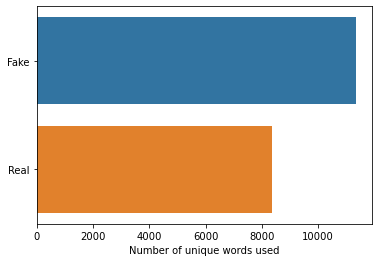

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.barplot([unique_words_used_fake, unique_words_used_real], ['Fake', 'Real'])
plt.xlabel('Number of unique words used')

plt.show()

plt.close()

Result: we can see here Fake tweets have generally more unique words used, but this is explained with amount of fake tweets which is bigger that real ones.

### Most Used words

We already have some sort of counter, so let's sort them in descending order

In [8]:
# Let's look at the top 30
top_30_real = words_count_real.sort_values(ascending=False)[:30]
top_30_fake = words_count_fake.sort_values(ascending=False)[:30]

In [9]:
top_30_fake = top_30_fake.drop('id')
top_30_real = top_30_real.drop('id')

Let's check what words are now in top 30 using cloud of words, then if we find meaningless we will drop them

<Figure size 1200x800 with 0 Axes>

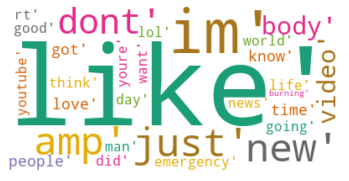

In [10]:
from wordcloud import WordCloud
# Now I will create plot_wordcloud function which I will be able to use multiple times by just calling

def plot_wordcloud(series): # It will take pd.Series as input

    plt.figure(figsize=(12, 8), dpi=100)
    wordcloud = WordCloud(max_font_size=150, max_words=100, colormap="Dark2", background_color="white").generate(str(series.index.values))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    plt.close()
    
plot_wordcloud(top_30_fake)

<Figure size 1200x800 with 0 Axes>

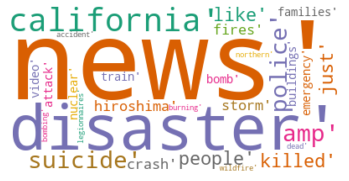

In [11]:
plot_wordcloud(top_30_real)

We can see here huge difference between most_common words in fake and real disaster tweets. Fake ones like: im, just, think, love, time. Words that are useless to describe disaster.

Real ones are less selfish and are like: news, disaster, accident, attack, suicide, police. Full of Information.

### Now, let's look at the difference between human-related and nature-related disasters

In [12]:
train_corpused

,id,text,target,human,nature
0,1,our deeds are the reason of this earthquake ma...,1,0.0,1.0
1,4,forest fire near la ronge sask canada,1,0.0,1.0
2,5,all residents asked to shelter in place are be...,1,0.0,1.0
3,6,people receive wildfires evacuation orders in ...,1,0.0,1.0
4,7,just got sent this photo from ruby alaska as s...,1,0.0,1.0
...,...,...,...,...,...
7608,10869,two giant cranes holding a bridge collapse int...,1,0.0,1.0
7609,10870,ariaahrary thetawniest the out of control wild...,1,0.0,1.0
7610,10871,s of volcano hawaii,1,0.0,1.0
7611,10872,police investigating after an ebike collided w...,1,0.0,1.0


In [13]:
#take ID 
human_related = train_corpused.loc[train_corpused['human'] == 1, 'id']
nature_related = train_corpused.loc[train_corpused['nature'] == 1, 'id']

In [14]:
print(f'Amount of nature related tweets: {nature_related.shape}, and human-related: {human_related.shape}')

Amount of nature related tweets: (2843,), and human-related: (4770,)


We can actually see that there more tweets about human-made or human-related disasters nearly double times

In [15]:
human_related.values

array([  196,   197,   198, ..., 10832, 10833, 10834], dtype=int64)

In [16]:
# Let's create another function that will take dataframe, and list of id as input; filters by id; sums by each column; grabs first 30 words;
# and plots wordcloud

def automatically_plot(df, id_list):
    filtered = df[df['id'].isin(id_list)]
    filtered = filtered.drop('id', axis = 1)
    
    words_acc = filtered.sum(axis = 0)
    
    top_30 = words_acc.sort_values(ascending = False)[:30]
    
    plot_wordcloud(top_30)


<Figure size 1200x800 with 0 Axes>

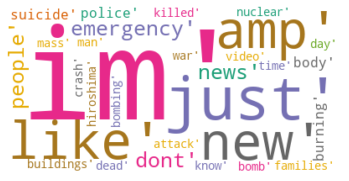

In [17]:
automatically_plot(train_dtm, human_related.values)

<Figure size 1200x800 with 0 Axes>

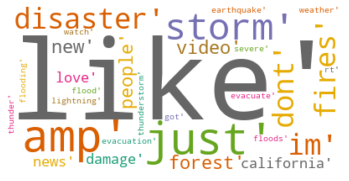

In [18]:
automatically_plot(train_dtm, nature_related.values)

It is hard to gain some knowledge from this wordclouds because there many meaningless words in both.

#### Next, I want to see distribution and correlation between real-fake and nature-human related types of tweets

Here we will have 4 different sets: real disasters that are human based and nature based; fake tweets that are human and nature based

[2001, 1270]
[2769, 1573]


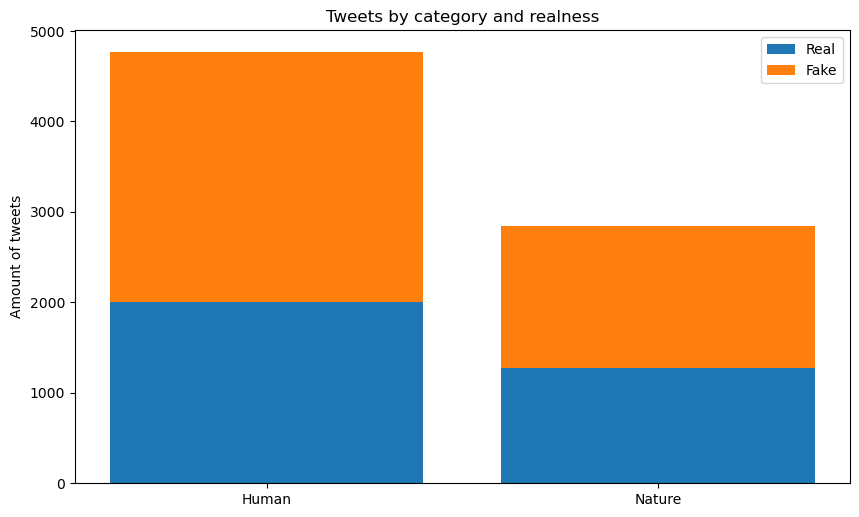

In [23]:
# Let's create function for this
# Input will be a corpused and date-term matrix for both train and test sets

# The thing I am trying to do is put into function all things above just to avoid doing things manually again next time 
# for other project or for another purpose

def distributions_plot(df_dtm, real_id, nature_id):
    
    real_nature = len(df_dtm[ (df_dtm['id'].isin(real_id)) & (df_dtm['id'].isin(nature_id)) ])
    
    real_human = len(df_dtm[ (df_dtm['id'].isin(real_id)) & ~(df_dtm['id'].isin(nature_id)) ])
    
    fake_nature = len(df_dtm[ ~(df_dtm['id'].isin(real_id)) & (df_dtm['id'].isin(nature_id)) ])
    
    fake_human = len(df_dtm[ ~(df_dtm['id'].isin(real_id)) & ~(df_dtm['id'].isin(nature_id)) ])
    
    
    
    bars = range(2)
    width = 0.2
    
    nature =  [real_nature, real_human]
    human = [fake_nature, fake_human]
    
    print(nature)
    print(human)
    
    plt.figure(figsize=(10, 6), dpi = 100)
    
    p1 = plt.bar(bars,nature)
    p2 = plt.bar(bars, human, bottom = nature)
    
    plt.ylabel('Amount of tweets')
    plt.title('Tweets by category and realness')
    
    plt.xticks(bars, ('Human', 'Nature'))
    plt.legend((p1[0], p2[0]), ('Real', 'Fake'), loc = 'upper right')
    
    plt.show()
    
distributions_plot(train_dtm, real_tweets, human_related)

#### Dimension reduction

In [52]:
# Now I want to create a function that takes dataframe and removes columns(words) that are occured less than 10 times

def remove_less_occured(train_df, test_df):
    #train_df.drop('id', axis = 1, inplace = True)
    words_occ = train_df.sum(axis = 0)
    
    
    
    to_remove = list(words_occ[words_occ < 3].index)
    train_df = train_df.drop(to_remove, axis = 1)
    
    
    test_df = test_df.drop(to_remove, axis = 1)
    

    return (train_df, test_df)



train_dtm, test_dtm = remove_less_occured(train_dtm, test_dtm)

train_dtm.shape

(7613, 4025)

In [53]:
test_dtm.shape

(3263, 4026)

Now from over 15000 columns we removed 10000

In [55]:
# Let's save data for next step

test_dtm.to_pickle('test_dtm_reduced.pkl')

train_dtm.to_pickle('train_dtm_reduced.pkl')